In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r'/Users/spathak/Instacart_Basket_Analysis'

In [6]:
#Importing Instacart_Basket_merged.pkl dataframe

df_merge = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data','Instacart_Basket_merged.pkl'))

In [4]:
df_merge.head()

,user_id,first_name,last_name,sex,STATE,age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular busy days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular busy days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest_days,Most orders,9.0,New customer,8.205882,Low Spender,20.0,Regular customer,both


<AxesSubplot:>

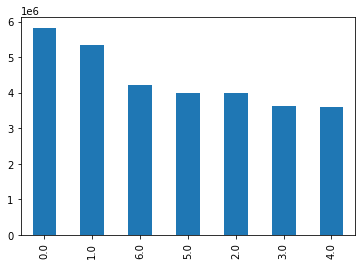

In [5]:
# creating bar chart
df_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

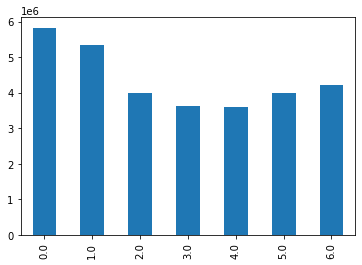

In [6]:
# creating bar chart by sorting
df_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
df_merge['orders_day_of_week'].value_counts()

0.0    5827646
1.0    5340072
6.0    4224610
5.0    3983382
2.0    3976796
3.0    3628691
4.0    3583046
Name: orders_day_of_week, dtype: int64

In [8]:
df_merge['orders_day_of_week'].value_counts().sort_index()

0.0    5827646
1.0    5340072
2.0    3976796
3.0    3628691
4.0    3583046
5.0    3983382
6.0    4224610
Name: orders_day_of_week, dtype: int64

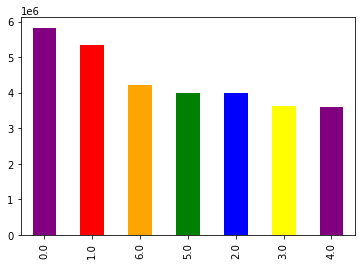

In [27]:
# creating bar chart by different colors
bar = df_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','orange','green','blue','yellow'])

In [28]:
bar.figure.savefig(os.path.join(path, '04-Analysis','Visualization', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

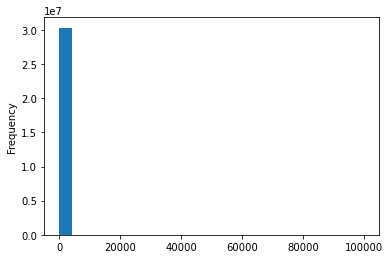

In [15]:
# creating histogram
df_merge['prices'].plot.hist(bins = 25)

In [16]:
df_merge['prices'].describe()

count    3.032984e+07
mean     1.197707e+01
std      4.963641e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
df_merge['prices'].mean()

11.97706915727709

In [18]:
df_merge['prices'].median()

7.4

In [19]:
df_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

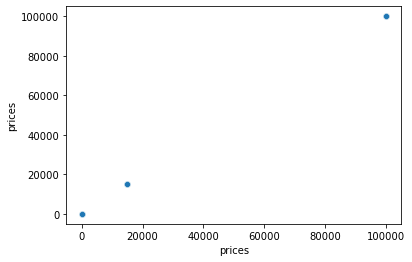

In [20]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_merge)

In [21]:
df_merge.loc[df_merge['prices'] > 100]

,user_id,first_name,last_name,sex,STATE,age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
5226,117740,Lisa,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,...,Regularly busy,Busiest_days,Most orders,85.0,Loyal customer,37.052165,High Spender,4.0,Frequent customer,both
9794,31590,Beverly,Sanford,Female,Montana,46,1/1/2017,0,single,154076,...,Regularly busy,Busiest_days,Aaverage orders,39.0,Regular customer,59.676655,High Spender,8.0,Frequent customer,both
26118,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,Busiest day,Busiest_days,Most orders,6.0,New customer,587.820779,High Spender,11.0,Regular customer,both
26119,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,Busiest day,Busiest_days,Most orders,6.0,New customer,587.820779,High Spender,11.0,Regular customer,both
26120,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,Regularly busy,Regular busy days,Aaverage orders,6.0,New customer,587.820779,High Spender,11.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30551227,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,Regularly busy,Slowest_days,Most orders,54.0,Loyal customer,71.320380,High Spender,7.0,Frequent customer,both
30551228,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,Regularly busy,Regular busy days,Aaverage orders,54.0,Loyal customer,71.320380,High Spender,7.0,Frequent customer,both
30551229,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,Regularly busy,Regular busy days,Most orders,54.0,Loyal customer,71.320380,High Spender,7.0,Frequent customer,both
30556976,140589,Clarence,Harper,Male,Maryland,26,4/1/2020,0,single,154845,...,Regularly busy,Regular busy days,Aaverage orders,10.0,New customer,978.420388,High Spender,20.0,Regular customer,both


In [22]:
df_merge.loc[df_merge['prices'] >100, 'prices'] = np.nan

In [9]:
df_merge['prices'].max()

99999.0

<AxesSubplot:ylabel='Frequency'>

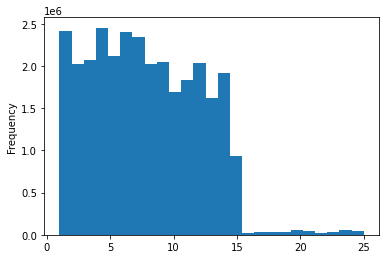

In [24]:
df_merge['prices'].plot.hist(bins = 25)

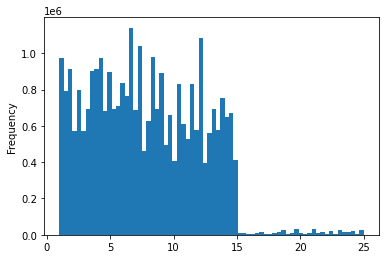

In [29]:
histogram_prices = df_merge['prices'].plot.hist(bins = 70)

In [31]:
histogram_prices.figure.savefig(os.path.join(path, '04-Analysis','Visualization', 'instacart_histogram_1000000.png'))

# creating histogram for order_hour_of_day

<AxesSubplot:ylabel='Frequency'>

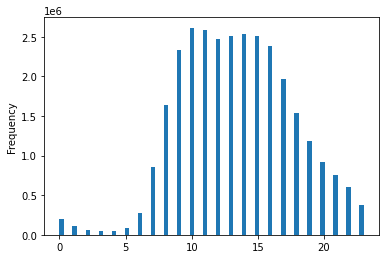

In [32]:
# creating histogram
df_merge['order_hour_of_day'].plot.hist(bins = 70)



In [34]:
# The histogram shows that during the day we have more orders and to be more price. 
  #The most orders were made between the 10-17 hour of the day. Then the orders steadily
 #decreased as people went to bed.

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

# creating bar chart for loyalty flag

<AxesSubplot:>

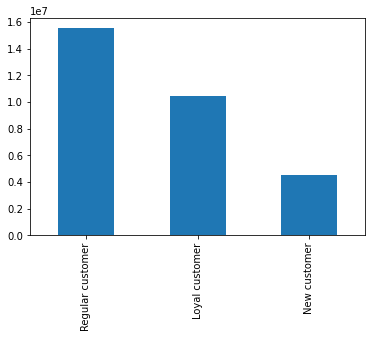

In [35]:
# creating bar chart
df_merge['loyalty_flag'].value_counts().plot.bar()

<AxesSubplot:>

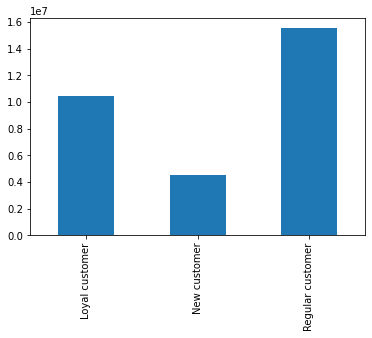

In [36]:
# creating bar chart by sorting
df_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [37]:
df_merge['loyalty_flag'].value_counts()

Regular customer    15518648
Loyal customer      10481344
New customer         4564251
Name: loyalty_flag, dtype: int64

In [38]:
df_merge['loyalty_flag'].value_counts().sort_index()

Loyal customer      10481344
New customer         4564251
Regular customer    15518648
Name: loyalty_flag, dtype: int64

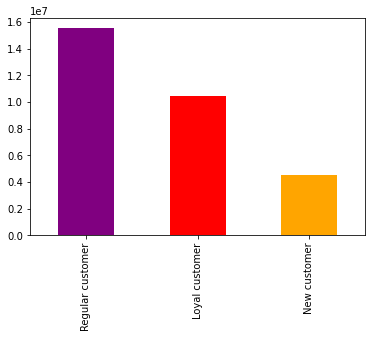

In [39]:
# creating bar chart by different colors
bar = df_merge['loyalty_flag'].value_counts().plot.bar(color=['purple','red','orange'])

In [41]:
bar.figure.savefig(os.path.join(path, '04-Analysis','Visualization', 'bar_loyalty_flag.png'))

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [42]:
# creating line chart
np.random.seed(4)
dev = np.random.rand(len(df_merge)) <= 0.7

In [43]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [44]:
np.random.rand(10)

array([0.9068232 , 0.13996656, 0.31467843, 0.55782977, 0.31540184,
       0.03438144, 0.15825806, 0.38599348, 0.89856761, 0.2316577 ])

In [45]:
big = df_merge[dev]
small = df_merge[~dev]

In [46]:
# store 70% of sample in the bigdataframe big
big=df_merge[dev]

In [47]:
# store 30% of sample in the bigdataframe small
big=df_merge[dev]

In [48]:
len(df_merge)

30564243

In [49]:
len(big)+len(small)

30564243

In [50]:
df_2 = small[['order_hour_of_day','prices']]

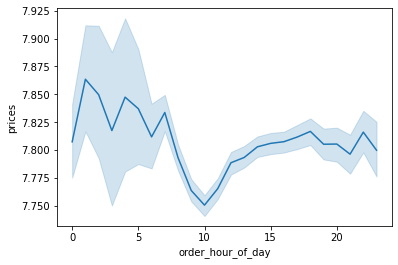

In [51]:
line=sns.lineplot(data=df_2,x='order_hour_of_day',y='prices')

In [52]:
df_4 = small[['order_hour_of_day','prices']]

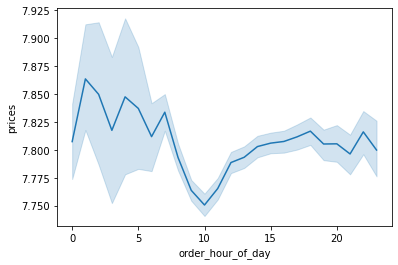

In [53]:
line_2=sns.lineplot(data=df_4,x='order_hour_of_day',y='prices')

In [55]:
#export line 
line_2.figure.savefig(os.path.join(path, '04-Analysis','Visualization', 'instacart_linesmall.png'))

# First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [56]:
df_2 = small[['age','fam_status']]

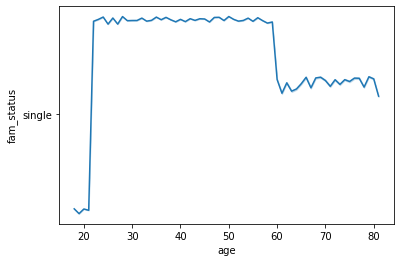

In [57]:
line_2=sns.lineplot(data=df_2,x='age',y='fam_status')

In [58]:
#export line 
line_2.figure.savefig(os.path.join(path, '04-Analysis','Visualization', 'instacart_linesmall_.png'))


# You’ll also need to explore whether there’s a connection between age and spending power (income).

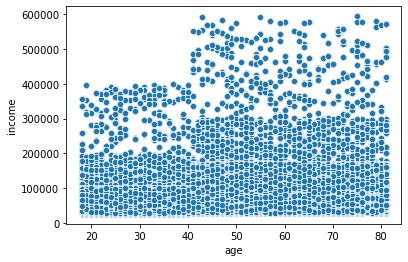

In [62]:
# creating scatterplot chart
scatter_plot=sns.scatterplot(x = 'age', y = 'income',data = df_merge)

#Yes there seems to be a relationship as people above the age of 40 have a higher income

In [63]:
#export scatter 
scatter_plot.figure.savefig(os.path.join(path,'04-Analysis','Visualization','instacart_scatter.png'))